In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math

In [39]:
style = {
    # Цвета
    'axes.facecolor': '#1E1E2F',  # Темно-фиолетовый фон
    'axes.edgecolor': '#FFFFFF',  # Белые оси
    'axes.labelcolor': '#FFFFFF',  # Белые подписи осей
    'xtick.color': '#FFFFFF',  # Белые метки на оси X
    'ytick.color': '#FFFFFF',  # Белые метки на оси Y
    'text.color': '#FFFFFF',  # Белый текст
    'figure.facecolor': '#1E1E2F',  # Темно-фиолетовый фон для фигуры
    'grid.color': '#4A4A6A',  # Светло-фиолетовая сетка
    'lines.linewidth': 1.3,  # Толщина линий
    'lines.color': '#FF6F61',  # Розовый цвет линий
    'patch.edgecolor': '#FFFFFF',  # Белые границы
    'boxplot.boxprops.color': '#FF6F61',  # Розовый для boxplot
    'boxplot.whiskerprops.color': '#FFFFFF',  # Белый для усов
    'boxplot.capprops.color': '#FF6F61',  # Розовый для крышек
    'boxplot.medianprops.color': '#00B4D8',  # Голубой для медианы
    'scatter.edgecolors': '#FF6F61'  # Розовый для точек
    #'hist.color': '#00B4D8', # Голубой для гистограмм
}

plt.style.use(style)


In [40]:
df = pd.read_csv('cars_clean')
df

,Unnamed: 0,brand,color,color_group,gearbox,drive,fuel_type,city,city_group,base_model,...,age,generation,is_new,is_restyling,is_pro,is_max,is_premium,price,power_density,mileage_age_interaction
0,0,Haval,серый,Нейтральные,робот,полный,Бензин,Москва,Москва,H3,...,1.0,1.0,False,0,0,0,0,2320000.0,118.000000,12000.0
1,1,Chery,серый,Нейтральные,механика,передний,Бензин,Москва,Москва,Tiggo,...,1.0,1.0,False,0,1,0,0,1490000.0,75.333333,52460.0
2,2,Haval,чёрный,Нейтральные,робот,полный,Бензин,Москва,Москва,H3,...,1.0,1.0,False,0,0,0,0,2650000.0,118.000000,6308.0
3,3,Geely,синий,Холодные,робот,передний,Бензин,Балашиха,Московская область,Okavango,...,2.0,1.0,False,1,0,0,0,2980000.0,100.000000,34338.0
4,4,Chery,серый,Нейтральные,робот,передний,Бензин,Москва,Москва,Tiggo,...,3.0,1.0,False,1,0,0,0,1500000.0,98.000000,66000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,1310,Geely,серебристый,Нейтральные,автомат,полный,Бензин,Москва,Москва,Monjaro,...,0.0,1.0,False,1,0,0,1,3830000.0,119.000000,0.0
1311,1311,Geely,голубой,Холодные,робот,передний,Бензин,Москва,Москва,Icon,...,1.0,1.0,False,0,0,0,0,2699999.0,120.666667,1.0
1312,1312,Geely,серый,Нейтральные,робот,передний,Бензин,Москва,Москва,Icon,...,1.0,1.0,False,0,0,0,0,2699999.0,120.666667,10.0
1313,1313,Geely,синий,Холодные,робот,полный,Бензин,Одинцово,Московская область,Atlas,...,3.0,1.0,False,0,1,0,0,2100000.0,118.000000,174000.0


In [48]:
target = 'price'
numeric_feats = ['mileage', 'power_1', 'power_2', 'model_popularity', 'age', 'generation', 'power_density', 'mileage_age_interaction']
cat_feats = ['brand', 'color', 'color_group', 'gearbox', 'drive', 'fuel_type', 'city', 'city_group', 'base_model', 'car_class']
dummies = ['is_new', 'is_restyling', 'is_pro', 'is_max', 'is_premium']

In [36]:
df = df[df['fuel_type'] != '/Users/akulinayuman/Downloads/cars_cleanБензин']

# Анализ категориальных признаков

### Brand

In [42]:
df['brand'].value_counts()

brand
Geely    889
Chery    329
Haval     97
Name: count, dtype: int64

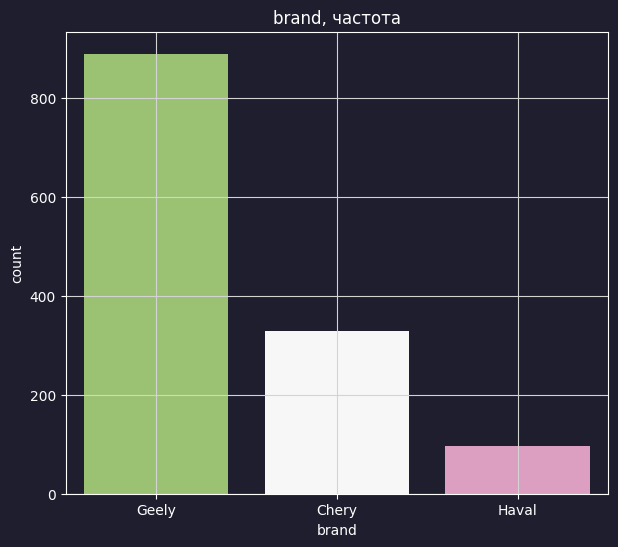

In [ ]:
plt.figure(figsize = (7,6))
u = df['brand'].value_counts().reset_index()
ax = sns.barplot(x=u['brand'], y=u['count'], palette='PiYG_r')
ax.set_title('brand, частота')
ax.grid(color='lightgray', which='both');

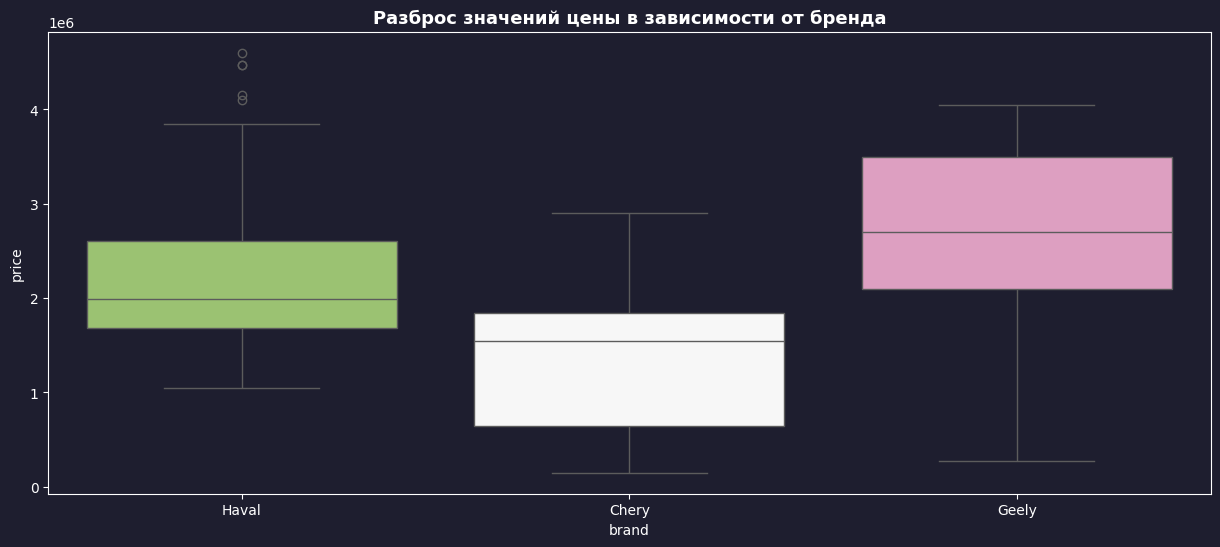

In [44]:
plt.figure(figsize = (15,6))
plt.title('Разброс значений цены в зависимости от бренда', fontsize='13', weight='bold')
sns.boxplot(df, x='brand', y='price', palette='PiYG_r');

### Color

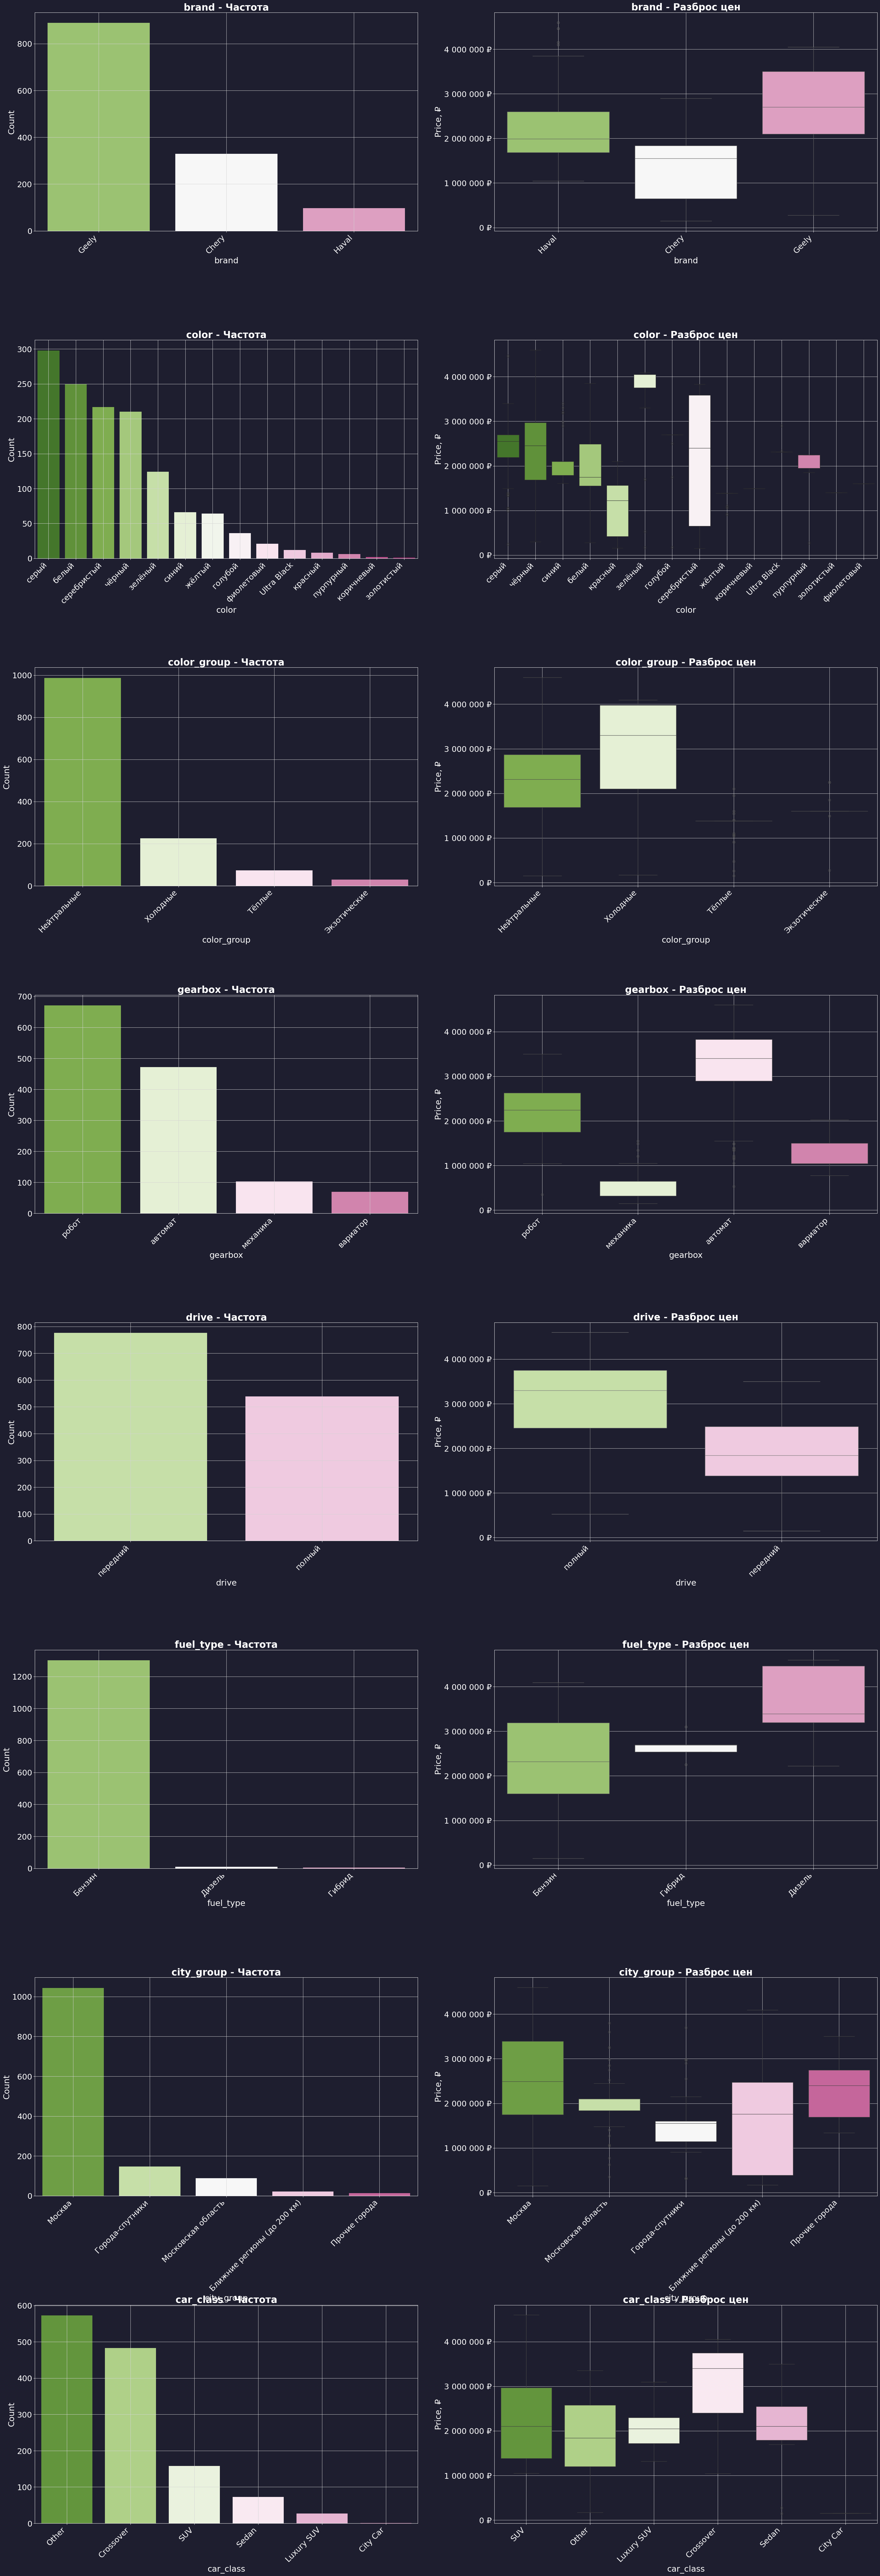

In [82]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

def rub_format(x, pos):
    return f'{int(x):,} ₽'.replace(',', ' ')

features = ['brand', 'color', 'color_group', 'gearbox', 'drive', 
            'fuel_type', 'city_group', 'car_class']

num_features = len(features)
fig, axes = plt.subplots(num_features, 2, figsize=(40, 15*num_features))

plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features):
    # Первый график - частотный барплот
    ax1 = axes[i, 0]
    u = df[feature].value_counts().reset_index()
    sns.barplot(x=u[feature], y=u['count'], palette='PiYG_r', ax=ax1)
    ax1.set_title(f'{feature} - Частота', fontsize=25, weight='bold')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=21)
    ax1.tick_params(axis='y', labelsize=21)
    ax1.set_xlabel(feature, fontsize=22)
    ax1.set_ylabel('Count', fontsize=22)
    ax1.grid(color='lightgray', which='both')
    
    # Второй график - боксплот по цене
    ax2 = axes[i, 1]
    sns.boxplot(data=df, x=feature, y='price', palette='PiYG_r', ax=ax2)
    ax2.set_title(f'{feature} - Разброс цен', fontsize=25, weight='bold')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=21)
    ax2.tick_params(axis='y', labelsize=21)
    ax2.set_xlabel(feature, fontsize=22)
    ax2.set_ylabel('Price, ₽', fontsize=22)
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(rub_format))
    ax2.grid(color='lightgray', which='both')

plt.show()


### Price

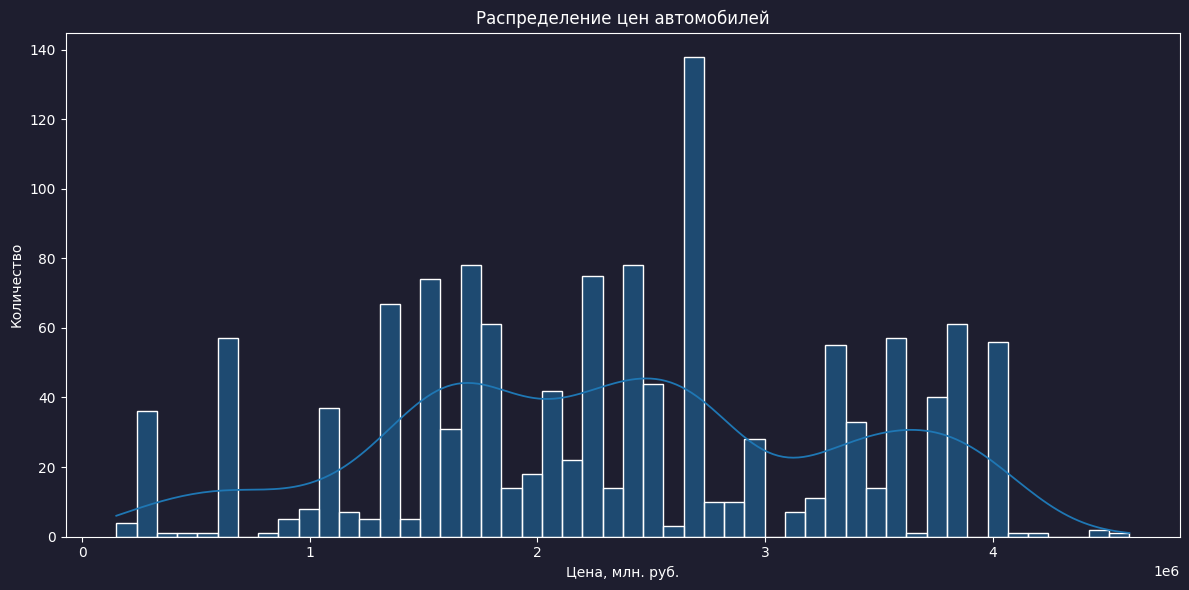

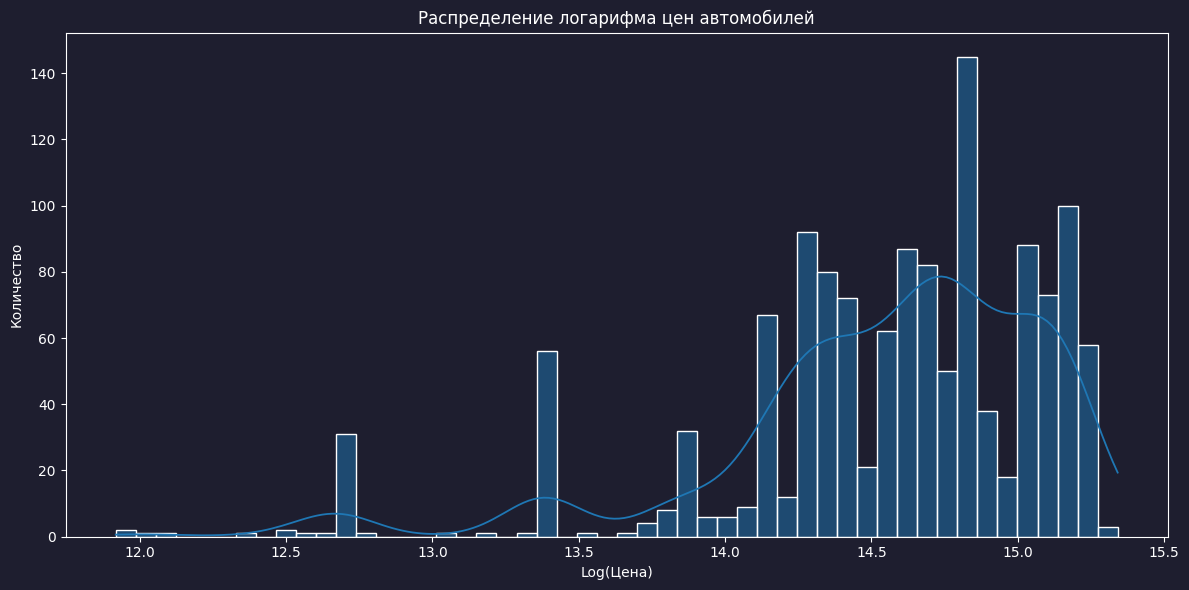

In [ ]:
def rub_format(x, pos):
    return f'{int(x):,} ₽'.replace(',', ' ')

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=target, bins=50, kde=True, palette='PiYG_r')
plt.title('Распределение цен автомобилей')
plt.xlabel('Цена, млн. руб.')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=np.log1p(df[target]), bins=50, kde=True, palette='PiYG_r')
plt.title('Распределение логарифма цен автомобилей')
plt.xlabel('Log(Цена)')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()


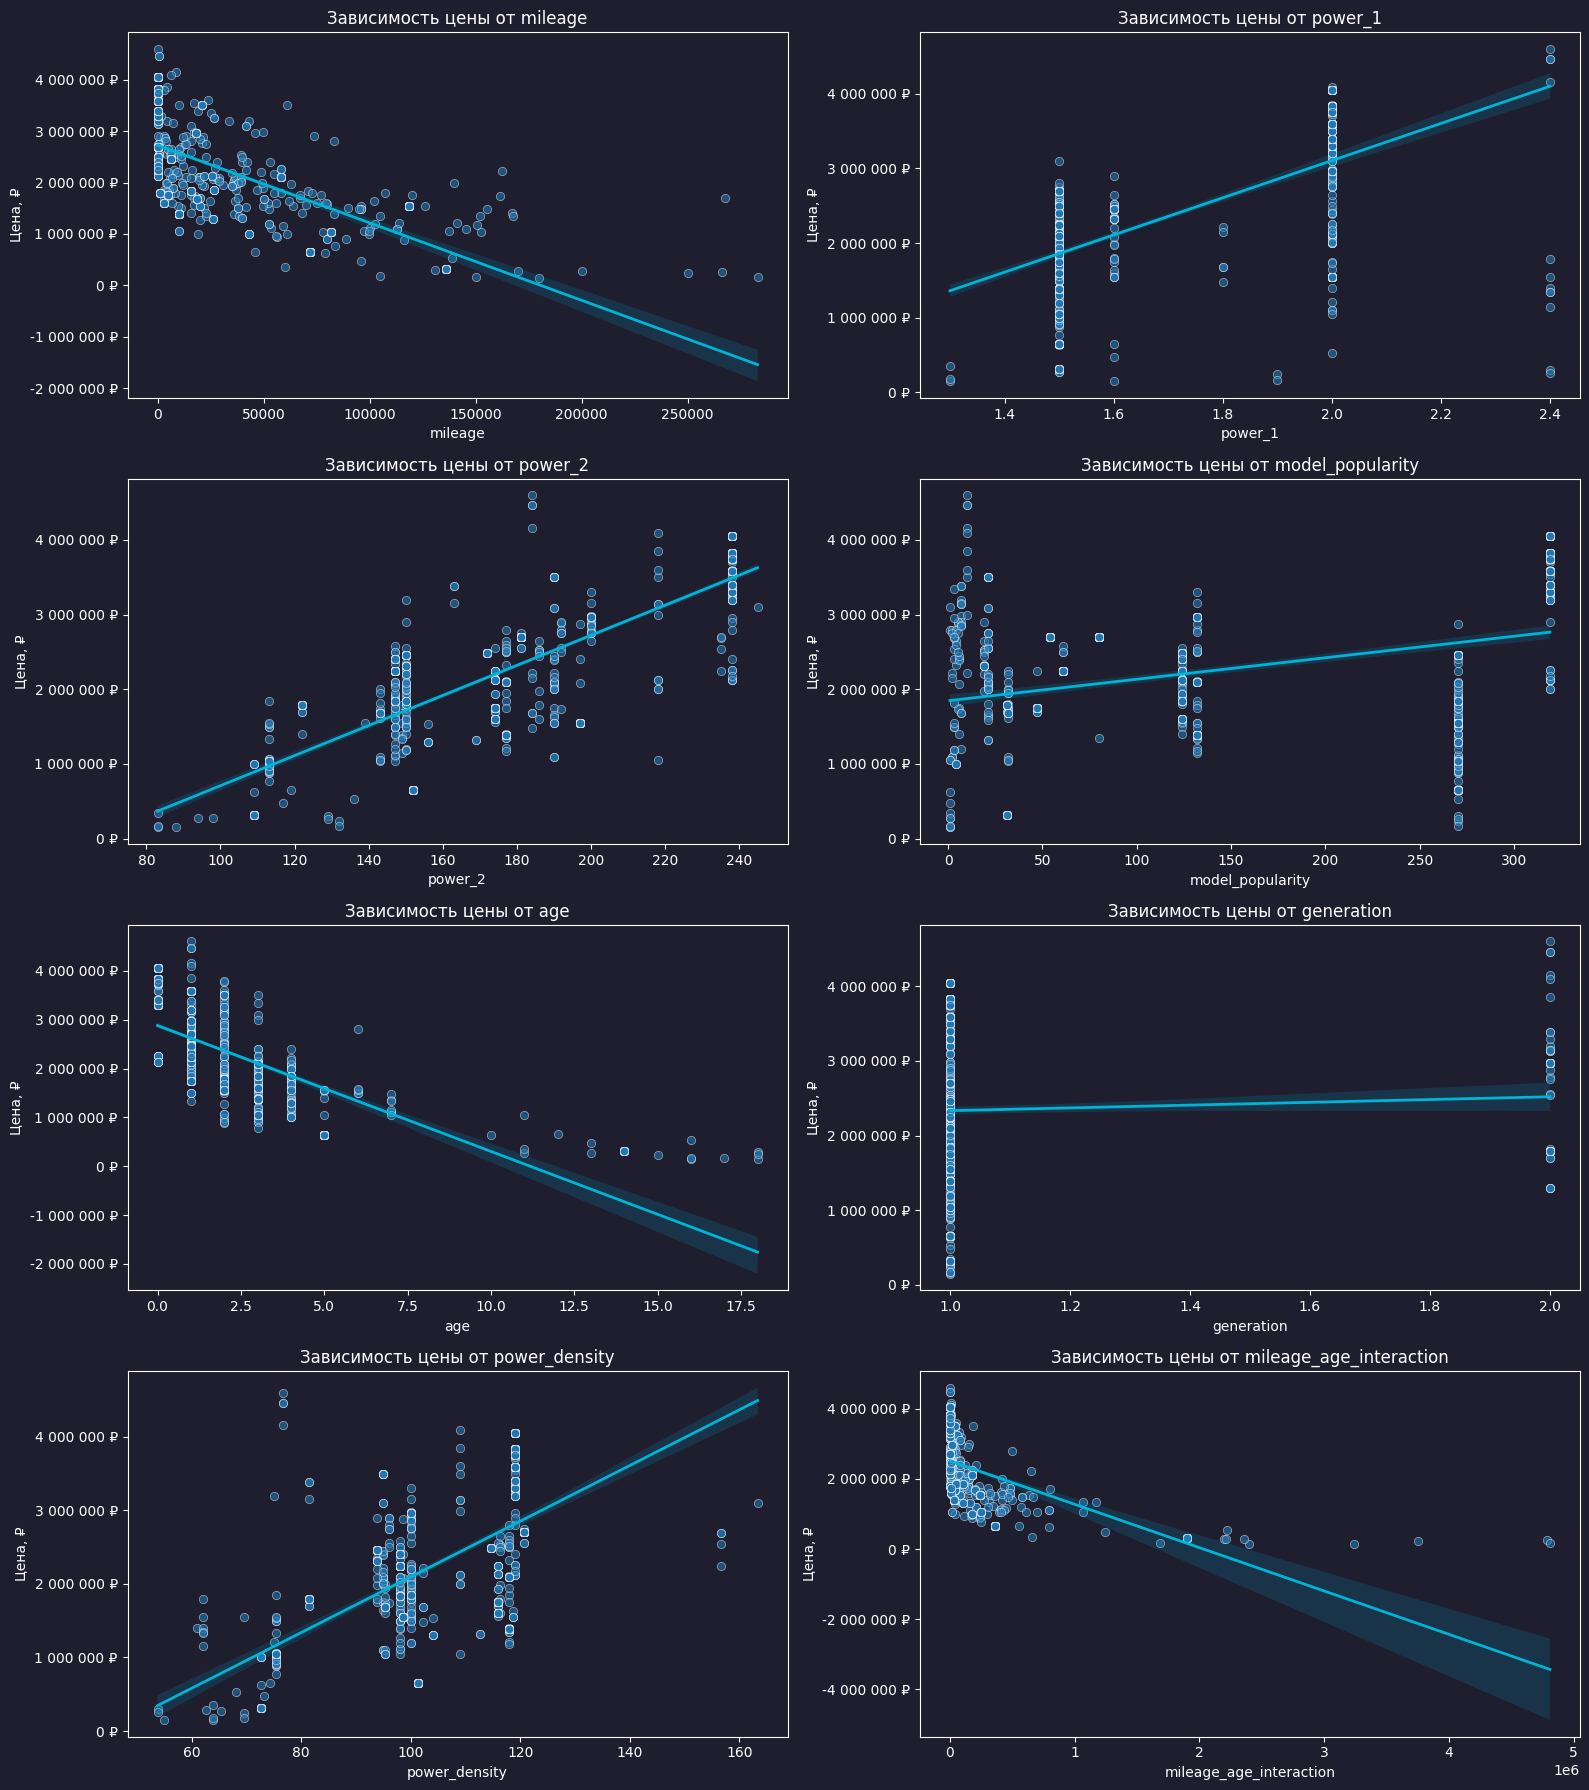

In [81]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd

def rub_format(x, pos):
    return f'{int(x):,} ₽'.replace(',', ' ')

plt.style.use(style)

for feat in numeric_feats:
    df[feat] = pd.to_numeric(df[feat], errors='coerce')

df[target] = pd.to_numeric(df[target], errors='coerce')

fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()

for i, feat in enumerate(numeric_feats):
    if i < len(axes):
        valid_data = df.dropna(subset=[feat, target])
        
        if not valid_data.empty:
            sns.scatterplot(data=valid_data, x=feat, y=target, ax=axes[i], alpha=0.6, palette='PiYG_r')
            
            if pd.api.types.is_numeric_dtype(valid_data[feat]) and pd.api.types.is_numeric_dtype(valid_data[target]):
                sns.regplot(data=valid_data, x=feat, y=target, ax=axes[i], 
                           scatter=False, color='#00B4D8', line_kws={"linewidth": 2})
            
            axes[i].set_title(f'Зависимость цены от {feat}')
            axes[i].set_xlabel(feat)
            axes[i].set_ylabel('Цена, ₽')
            axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(rub_format))
        else:
            axes[i].text(0.5, 0.5, f"Недостаточно данных для {feat}", 
                        horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()


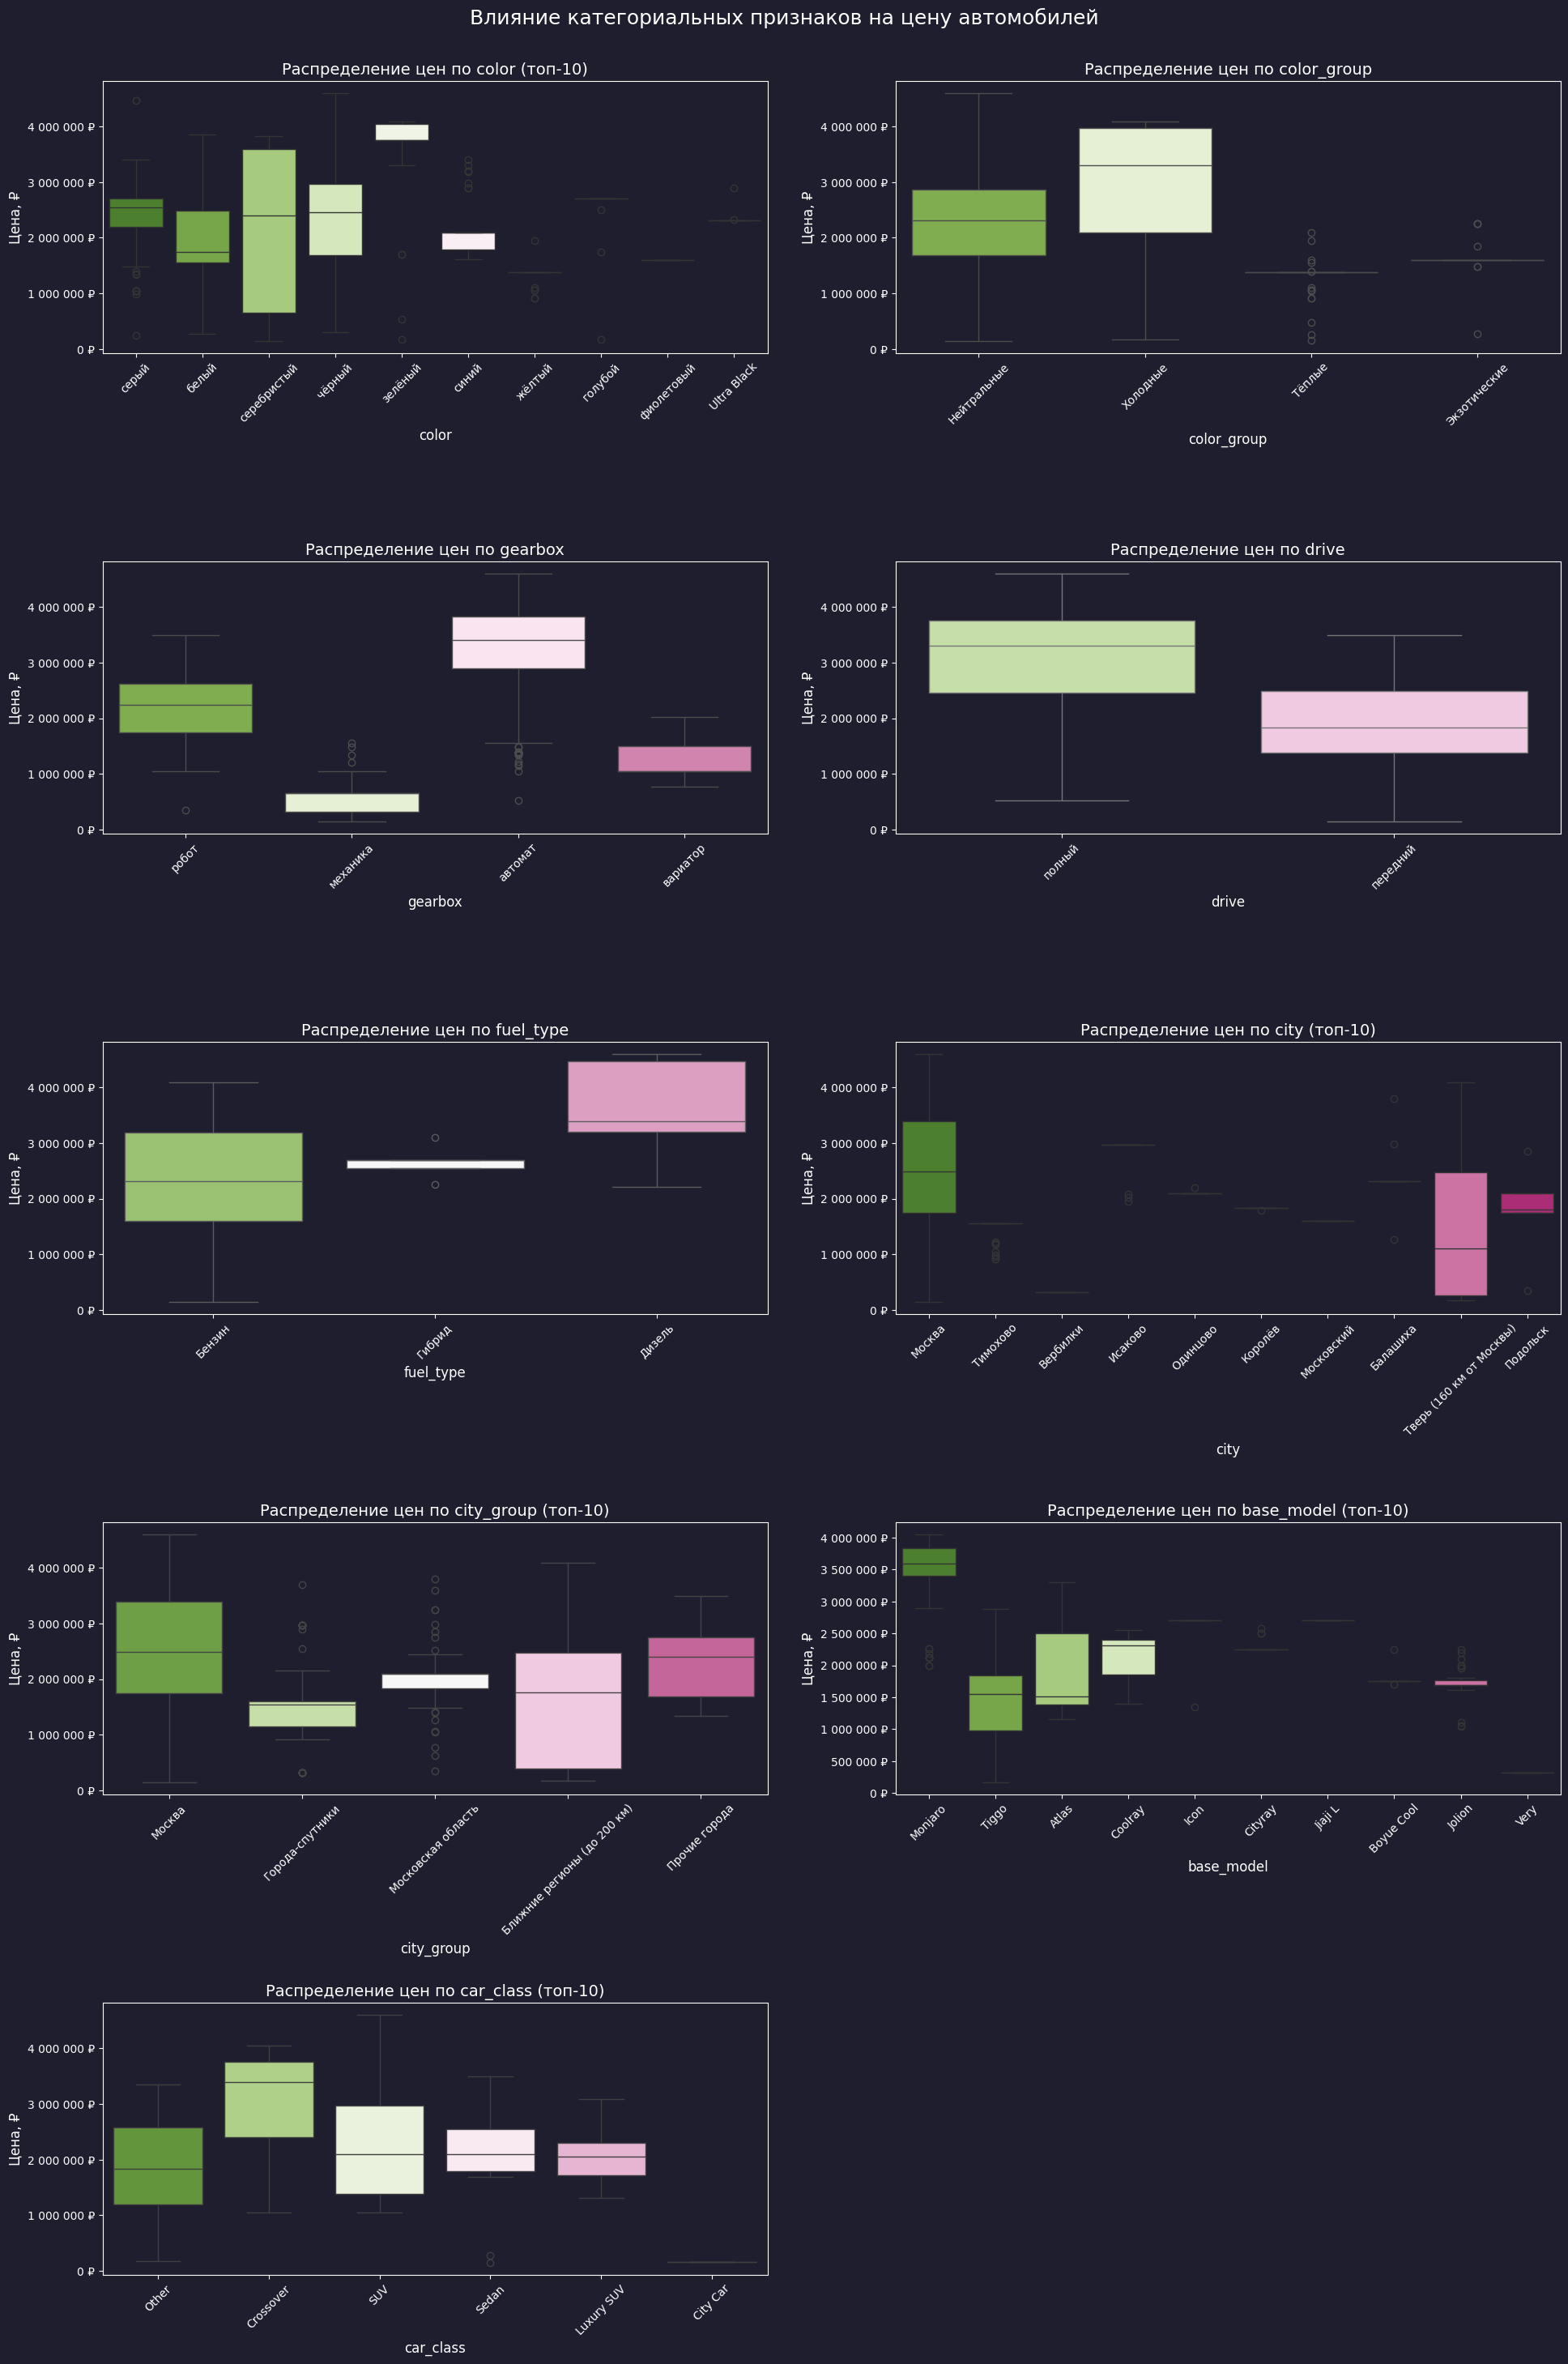

In [80]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
import math

def rub_format(x, pos):
    return f'{int(x):,} ₽'.replace(',', ' ')

cat_feats = ['color', 'color_group', 'gearbox', 'drive', 'fuel_type', 'city', 'city_group', 'base_model', 'car_class']

n_cols = 2
n_rows = math.ceil(len(cat_feats) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten()

for i, feat in enumerate(cat_feats):
    if i < len(axes):
        if feat == 'city' or feat == 'city_group' or feat == 'base_model' or feat == 'car_class' or feat == 'color':
            top_values = df[feat].value_counts().head(10).index
            plot_data = df[df[feat].isin(top_values)]
            ax = sns.boxplot(data=plot_data, x=feat, y=target, palette='PiYG_r', order=top_values, ax=axes[i])
            title_suffix = " (топ-10)"
        else:
            ax = sns.boxplot(data=df, x=feat, y=target, palette='PiYG_r', ax=axes[i])
            title_suffix = ""
        
        axes[i].set_title(f'Распределение цен по {feat}{title_suffix}', fontsize=14)
        axes[i].set_xlabel(feat, fontsize=12)
        axes[i].set_ylabel('Цена, ₽', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(rub_format))

for j in range(len(cat_feats), len(axes)):
    axes[j].axis('off')

plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.95)
plt.suptitle('Влияние категориальных признаков на цену автомобилей', fontsize=18)
plt.show()


### Binaries

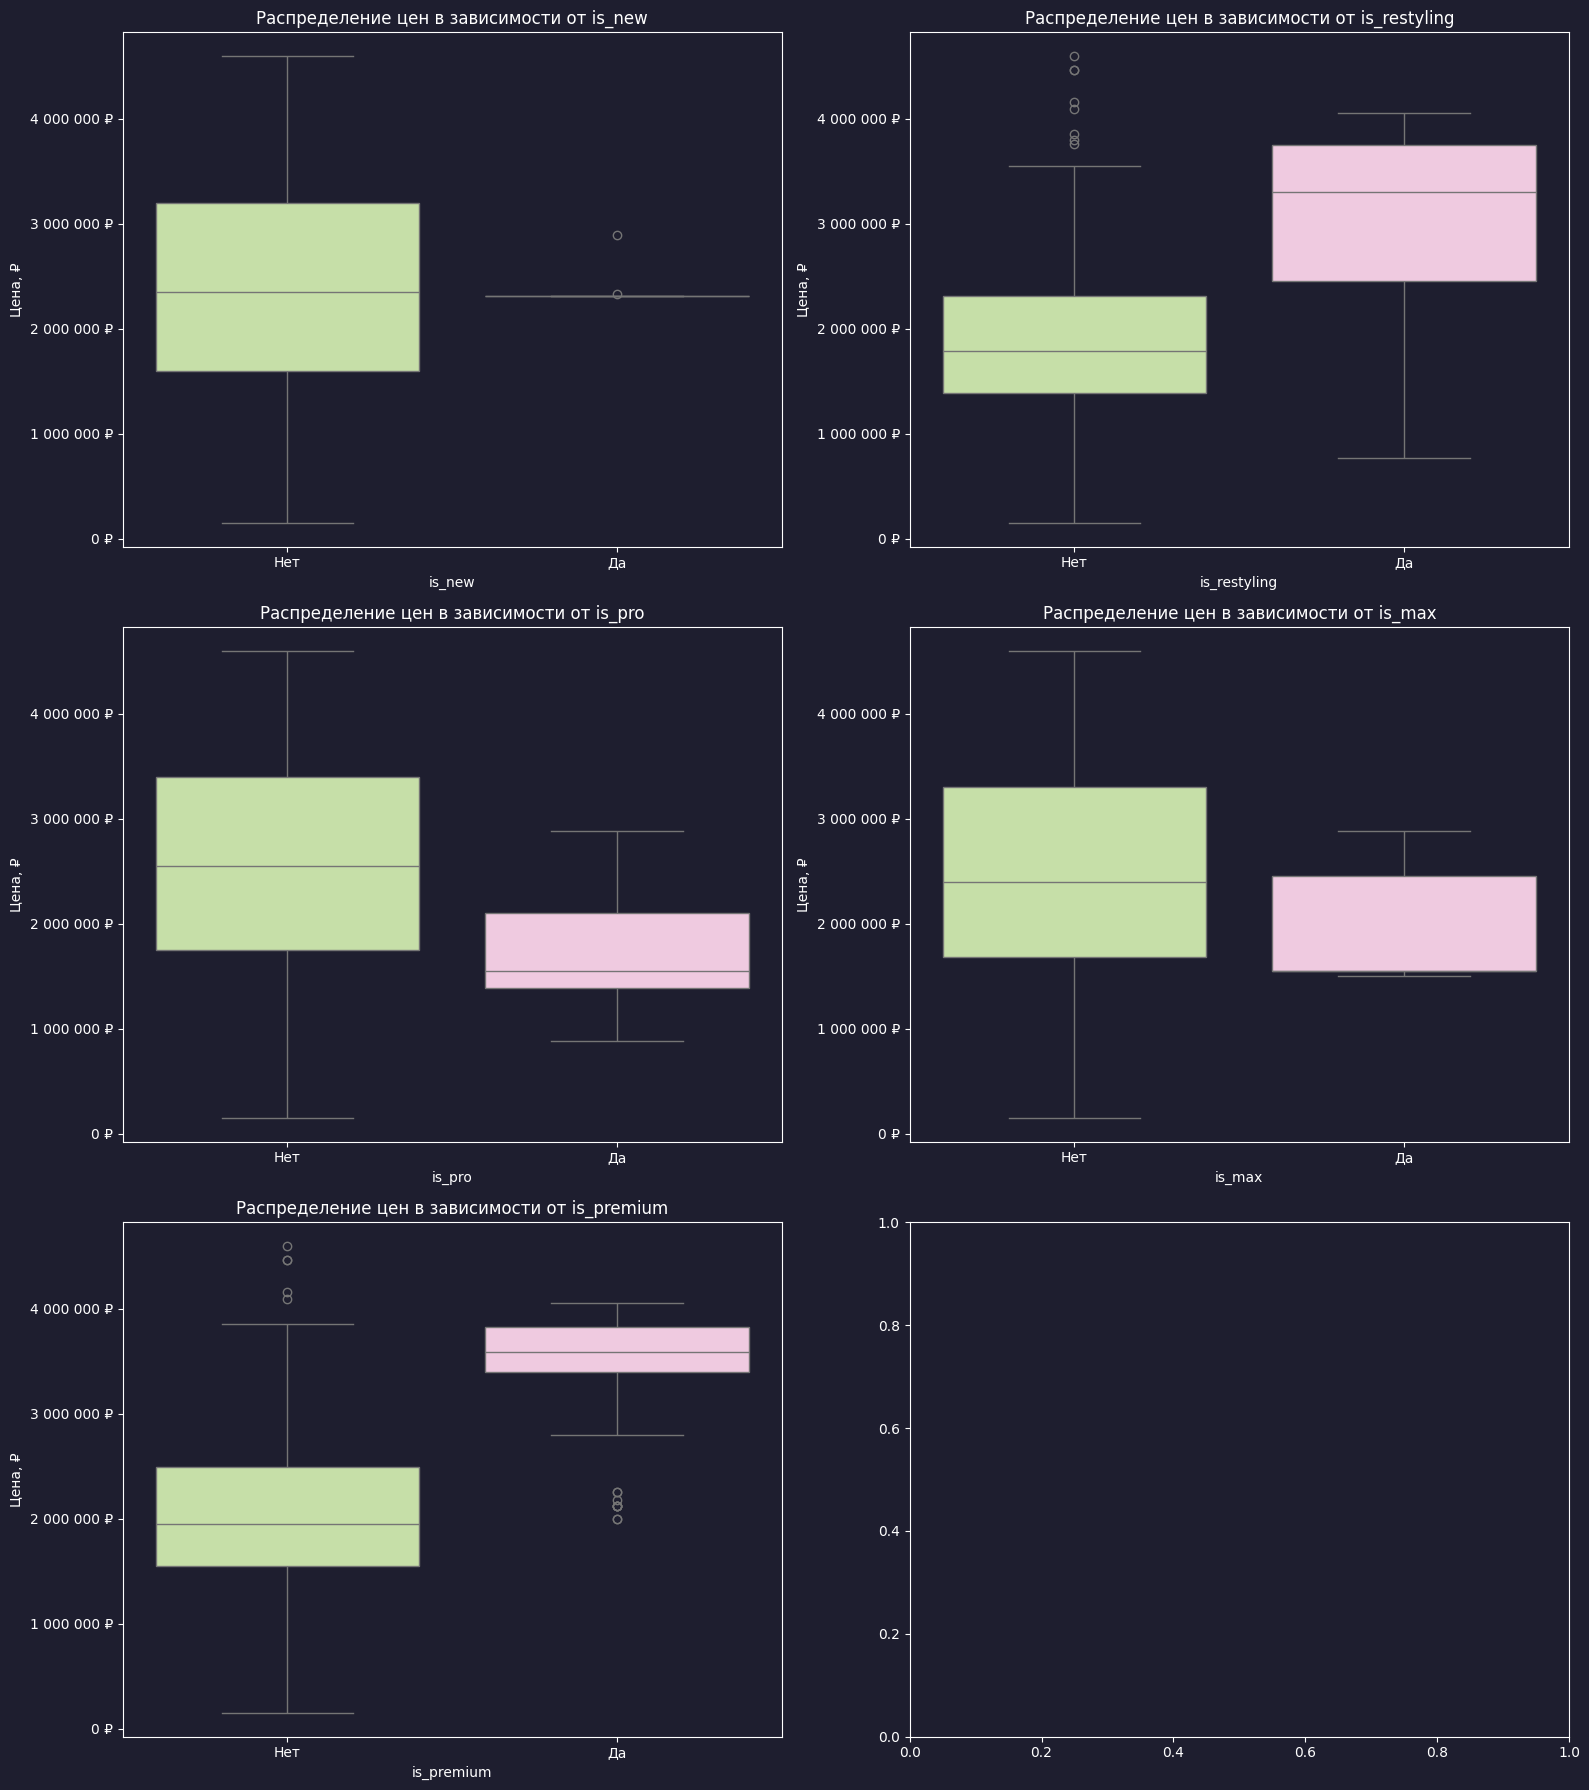

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, feat in enumerate(dummies):
    if i < len(axes):
        ax = sns.boxplot(data=df, x=feat, y=target, ax=axes[i], palette='PiYG_r')
        axes[i].set_title(f'Распределение цен в зависимости от {feat}')
        axes[i].set_xlabel(feat)
        axes[i].set_ylabel('Цена, ₽')
        axes[i].set_xticklabels(['Нет', 'Да'])

plt.tight_layout()
plt.show()


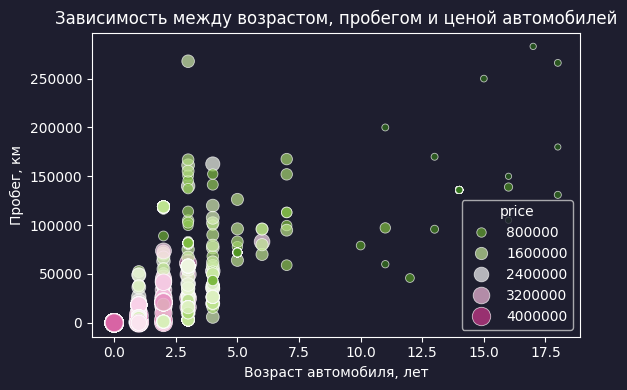

In [ ]:
plt.figure(figsize=(6, 4))
scatter = sns.scatterplot(data=df, x='age', y='mileage', hue=target, size=target, 
                           sizes=(20, 200), palette='PiYG_r', alpha=0.7)
plt.title('Зависимость между возрастом, пробегом и ценой автомобилей')
plt.xlabel('Возраст автомобиля, лет')
plt.ylabel('Пробег, км')
norm = plt.Normalize(df[target].min(), df[target].max())
sm = plt.cm.ScalarMappable(cmap='PiYG_r', norm=norm)
sm.set_array([])
plt.tight_layout()
plt.show()


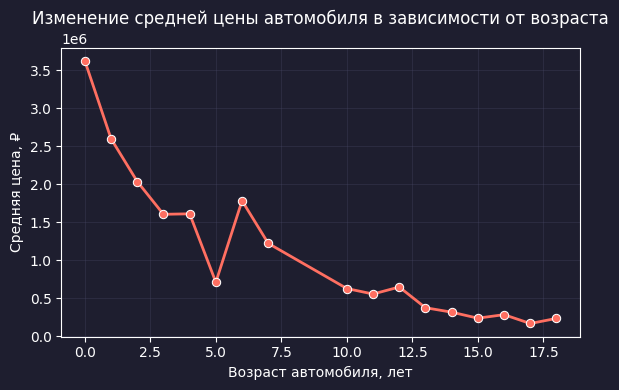

In [ ]:
plt.figure(figsize=(6, 4))
age_price = df.groupby('age')[target].mean().reset_index()
ax = sns.lineplot(data=age_price, x='age', y=target, marker='o', color='#FF6F61', linewidth=2)
plt.title('Изменение средней цены автомобиля в зависимости от возраста')
plt.xlabel('Возраст автомобиля, лет')
plt.ylabel('Средняя цена, ₽')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

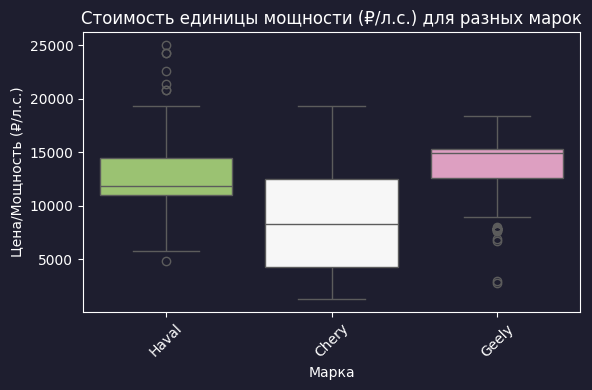

In [77]:
df['price_per_hp'] = df[target] / df['power_2']
plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=df[df['brand'].isin(top_brands)], x='brand', y='price_per_hp', palette='PiYG_r')
plt.title('Стоимость единицы мощности (₽/л.с.) для разных марок')
plt.xlabel('Марка')
plt.ylabel('Цена/Мощность (₽/л.с.)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Корреляционная матрица

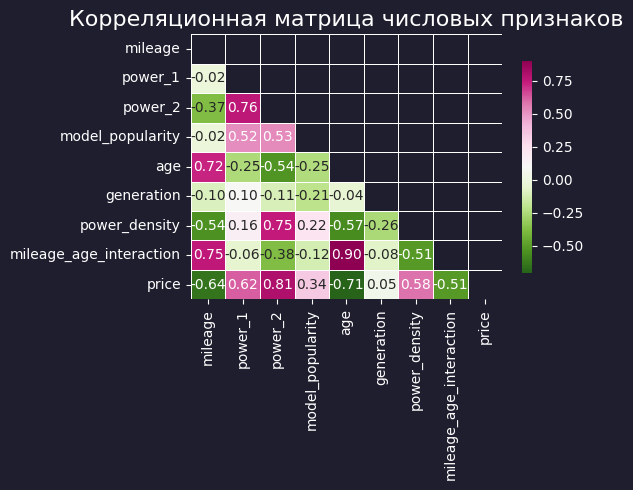


Корреляции с целевой переменной 'price':
power_2: 0.8052
power_1: 0.6223
power_density: 0.5820
model_popularity: 0.3441
generation: 0.0453
mileage_age_interaction: -0.5118
mileage: -0.6443
age: -0.7053


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

numeric_feats_for_corr = numeric_feats + [target]

df_numeric = df[numeric_feats_for_corr].copy()
for col in df_numeric.columns:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(6, 5))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

heatmap = sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='PiYG_r',
    linewidths=0.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 10}
)

plt.title('Корреляционная матрица числовых признаков', fontsize=16)
plt.tight_layout()
plt.show()

target_correlations = corr_matrix[target].sort_values(ascending=False)
print(f"\nКорреляции с целевой переменной '{target}':")
for feature, correlation in target_correlations.items():
    if feature != target:
        print(f"{feature}: {correlation:.4f}")
